# PLE02: Gimnasio - Partición del conjunto de datos e implemetación de los modelos.

Autor: Hugo Iglesias Pombo  
Fecha: 23/10/2024    
Asignatura: Aprendizaje Automático  

### 1. Importación de librerías y dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import plotly.express as px
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score # GridSearchCV sirve para optimizar los hiperparámetros de un modelo y cross_val_score para evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score, make_scorer # mean_squared_error es el error cuadrático medio, r2_score es el coeficiente de determinación
import joblib
#from IPython.display import display

In [2]:
# Importamos el dataset
df = pd.read_csv('ple02_transform.csv')
df.head()

,Edad,BPM_Promedio,Duración_Sesión,Calorías_Quemadas,Porcentaje_Grasa,Ingesta_Agua,Frecuencia_Entrenamiento,Nivel_Experiencia,IMC,Mujer,Hombre
0,1.428305,0.956734,1.317480,1.647458,-2.133010,1.530813,0.779462,1.662926,1.131207,-1.030706,1.030706
1,0.601094,0.537860,0.156274,-0.027995,1.411428,-0.819166,0.779462,0.294269,1.456176,0.970208,-0.970208
2,-0.557001,-1.486698,-0.409441,-0.830654,1.328226,-0.483454,0.779462,0.294269,0.140052,0.970208,-0.970208
3,-1.136049,1.445420,-1.957715,-1.395632,0.562760,-0.819166,-0.325394,-1.074388,-0.997340,-1.030706,1.030706
4,-0.060674,1.026546,-1.808842,-1.302118,0.629322,0.355824,-0.325394,-1.074388,-1.723104,-1.030706,1.030706


#### Partición del conjunto de datos

In [9]:
#Definir las características (features) y la variable objetivo (target)
#'Calorías_Quemadas' es la variable objetivo
X = df.drop(columns=['Calorías_Quemadas']) # se parte el dataset en dos partes, una con las características y otra con la variable objetivo
y = df['Calorías_Quemadas']

# Realizar la partición del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # se divide el dataset en dos partes, una para entrenamiento y se usa el 20% de los datos para prueba, random_state es la semilla para la generación de números aleatorios (es decir, la partición será la misma en cada ejecución)

#Guardamos cada partición en un archivo CSV
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Mostrar el tamaño de los conjuntos de datos
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]} muestras')


Tamaño del conjunto de entrenamiento: 669 muestras
Tamaño del conjunto de prueba: 224 muestras


## Justificación para Utilizar SVR, Random Forest y Regresión Lineal

En la PLE02, se requiere la selección y evaluación de al menos tres modelos distintos para predecir la cantidad de calorías quemadas en una sesión de entrenamiento en función de otras variables. A continuación, se justifica la elección de los modelos SVR (Support Vector Regression), Random Forest y Regresión Lineal:

### 1. Regresión Lineal
La regresión lineal es uno de los modelos más simples y ampliamente utilizados para problemas de regresión. Es útil para establecer una relación lineal entre las variables independientes y la variable dependiente. La simplicidad y la interpretabilidad de la regresión lineal la hacen una buena opción inicial para entender las relaciones básicas en los datos.

- **Ventajas**:
  - Fácil de interpretar y explicar.
  - Rápido de entrenar y evaluar.
  - Útil para identificar relaciones lineales entre variables.

- **Aplicación en PLE02**:
  - Puede ser utilizada para establecer una línea base y comparar el rendimiento de modelos más complejos.
  - Es adecuada cuando se espera que las relaciones entre las variables sean lineales.

### 2. Support Vector Regression (SVR)
SVR es una extensión del algoritmo de Support Vector Machines (SVM) para problemas de regresión. Es eficaz en espacios de alta dimensionalidad y puede manejar relaciones no lineales mediante el uso de kernels.

- **Ventajas**:
  - Capaz de modelar relaciones no lineales mediante el uso de kernels.
  - Robusto a outliers debido a la maximización del margen.
  - Eficaz en espacios de alta dimensionalidad.

- **Aplicación en PLE02**:
  - Adecuado para datos donde se sospecha que las relaciones entre las variables no son estrictamente lineales.
  - Útil para capturar patrones complejos en los datos.

### 3. Random Forest
Random Forest es un modelo de ensamble que utiliza múltiples árboles de decisión para mejorar la precisión y reducir el sobreajuste. Es robusto y puede manejar tanto relaciones lineales como no lineales.

- **Ventajas**:
  - Maneja relaciones no lineales y complejas.
  - Reduce el riesgo de sobreajuste mediante el uso de múltiples árboles.
  - Robusto a outliers y datos faltantes.
  - Proporciona una estimación de la importancia de las variables.

- **Aplicación en PLE02**:
  - Ideal para datos con relaciones complejas y no lineales.
  - Útil cuando se necesita una alta precisión y robustez en el modelo.
  - Puede ser utilizado para identificar las variables más importantes en el conjunto de datos.

### Conclusión
La combinación de estos tres modelos proporciona una cobertura amplia de diferentes tipos de relaciones en los datos:

- **Regresión Lineal**: Para capturar relaciones lineales simples y establecer una línea base.
- **SVR**: Para modelar relaciones no lineales y manejar datos de alta dimensionalidad.
- **Random Forest**: Para capturar relaciones complejas y no lineales, y proporcionar robustez y precisión.

Utilizar estos modelos permitirá comparar y contrastar sus rendimientos, proporcionando una visión más completa y precisa de las relaciones en los datos y mejorando la capacidad predictiva del análisis. Además, la validación cruzada y la exploración de hiperparámetros se integrarán en el proceso de entrenamiento para asegurar la robustez y la generalización de los modelos, cumpliendo con los requisitos de la práctica PLE02.


### Regresión Lineal

##### Entrenamiento del modelo

In [10]:
# Regresión lineal
from sklearn.linear_model import LinearRegression
# Crear el modelo de regresión lineal
modelo_regresion_lineal = LinearRegression()
# Entrenar el modelo utilizando el conjunto de entrenamiento
modelo_regresion_lineal.fit(X_train, y_train)

LinearRegression()

##### Persistencia del modelo

In [11]:
joblib.dump(modelo_regresion_lineal, 'rl_transform.pkl')

['rl_transform.pkl']

##### Realización de predicciones

In [13]:
# Realizar predicciones en el conjunto de prueba
y_pred_rl = modelo_regresion_lineal.predict(X_test)

##### Evaluación del modelo

In [15]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import cross_val_score

# Evaluar el modelo utilizando métricas de rendimiento
# Calculamos el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R^2) en el conjunto de prueba

# El MSE mide el promedio de los errores al cuadrado entre los valores predichos y los valores reales.
# Un valor más bajo de MSE indica un mejor ajuste del modelo.
mse_rl = mean_squared_error(y_test, y_pred_rl)

# El R^2 mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes.
# Un valor de R^2 más cercano a 1 indica un mejor ajuste del modelo.
r2_rl = r2_score(y_test, y_pred_rl)

# Imprimimos los resultados de las métricas de rendimiento
print(f'Error Cuadrático Medio (MSE): {mse_rl}')
print(f'Coeficiente de Determinación (R^2): {r2_rl}')

# Validación cruzada para evaluar la robustez del modelo
# Utilizamos validación cruzada con 5 particiones (cv=5) y la métrica de error cuadrático medio negativo

# La validación cruzada ayuda a evaluar la capacidad del modelo para generalizar a datos no vistos.
# Aquí usamos 5 particiones y calculamos el MSE negativo para cada partición.
scores = cross_val_score(modelo_regresion_lineal, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculamos el promedio y la desviación estándar del MSE a partir de los resultados de la validación cruzada
# El promedio del MSE nos da una idea del error esperado, mientras que la desviación estándar nos indica la variabilidad del error.
mean_mse_rl = -scores.mean() # scores es negativo (porque usamos 'neg_mean_squared_error'), por lo que lo convertimos a positivo
std_mse_rl = scores.std()

# Imprimimos los resultados de la validación cruzada
print(f'Error Cuadrático Medio (MSE) con Validación Cruzada: {mean_mse_rl}')
print(f'Desviación Estándar del MSE: {std_mse_rl}')

Error Cuadrático Medio (MSE): 0.02099860925163847
Coeficiente de Determinación (R^2): 0.98002592687663
Error Cuadrático Medio (MSE) con Validación Cruzada: 0.02074599430051312
Desviación Estándar del MSE: 0.0023601696510944137


#### Validación Cruzada

##### ¿Qué es la Validación Cruzada?

La validación cruzada es una técnica utilizada para evaluar la capacidad de generalización de un modelo de aprendizaje automático. Divide el conjunto de datos en múltiples subconjuntos (o "folds") y realiza múltiples rondas de entrenamiento y evaluación. Esto proporciona una estimación más robusta del rendimiento del modelo y ayuda a detectar problemas como el sobreajuste.

##### Tipos de Validación Cruzada

El tipo más común es la **validación cruzada k-fold**. En este método, el conjunto de datos se divide en `k` subconjuntos de igual tamaño. El modelo se entrena `k` veces, cada vez utilizando `k-1` subconjuntos para el entrenamiento y el subconjunto restante para la evaluación. El rendimiento del modelo se promedia a lo largo de las `k` rondas para obtener una estimación final.

##### Cómo Llevar a Cabo la Validación Cruzada

En el contexto de la práctica PLE02, utilizamos la validación cruzada para evaluar la robustez del modelo de regresión lineal. A continuación se muestra cómo se lleva a cabo la validación cruzada utilizando `scikit-learn`:

### SVR

##### Entrenamiento del modelo

In [16]:
# SVR
from sklearn.svm import SVR
# Crear el modelo de regresión de vectores de soporte (SVR)
modelo_svr = SVR(kernel='linear')
# Entrenar el modelo utilizando el conjunto de entrenamiento
modelo_svr.fit(X_train, y_train)

SVR(kernel='linear')

##### Persistencia del modelo

In [18]:
joblib.dump(modelo_svr, 'svr_transform.pkl')

['svr_transform.pkl']

##### Realización de predicciones

In [20]:
# Realizar predicciones en el conjunto de prueba
y_pred_svr = modelo_svr.predict(X_test)

##### Evaluación del modelo

In [21]:
# Evaluación del modelo SVR 
# Calculamos el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R^2) en el conjunto de prueba
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Imprimimos los resultados de las métricas de rendimiento para SVR
print(f'Error Cuadrático Medio (MSE) - SVR: {mse_svr}')
print(f'Coeficiente de Determinación (R^2) - SVR: {r2_svr}')

# Validación cruzada para evaluar la robustez del modelo SVR
# Utilizamos validación cruzada con 5 particiones (cv=5) y la métrica de error cuadrático medio negativo
scores_svr = cross_val_score(modelo_svr, X, y, cv=5, scoring='neg_mean_squared_error')
mean_mse_svr = -scores_svr.mean()
std_mse_svr = scores_svr.std()

# Imprimimos los resultados de la validación cruzada para SVR
print(f'Error Cuadrático Medio (MSE) con Validación Cruzada - SVR: {mean_mse_svr}')
print(f'Desviación Estándar del MSE - SVR: {std_mse_svr}')

Error Cuadrático Medio (MSE) - SVR: 0.021091833911410434
Coeficiente de Determinación (R^2) - SVR: 0.9799372507100862
Error Cuadrático Medio (MSE) con Validación Cruzada - SVR: 0.020903929466663376
Desviación Estándar del MSE - SVR: 0.002331909882206688


### Random Forest

##### Entrenamiento del modelo

In [22]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# Crear el modelo de Random Forest
modelo_random_forest = RandomForestRegressor(random_state=42)
# Entrenar el modelo utilizando el conjunto de entrenamiento
modelo_random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

##### Persistencia del modelo

In [23]:
joblib.dump(modelo_random_forest, 'rf_transform.pkl')

['rf_transform.pkl']

##### Realización de predicciones

In [24]:
# Realizar predicciones en el conjunto de prueba
y_pred_rf = modelo_random_forest.predict(X_test)

##### Evaluación del modelo

In [25]:
# Evaluar el modelo utilizando métricas de rendimiento
# Calculamos el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R^2) en el conjunto de prueba
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Imprimimos los resultados de las métricas de rendimiento
print(f'Error Cuadrático Medio (MSE) - Random Forest: {mse_rf}')
print(f'Coeficiente de Determinación (R^2) - Random Forest: {r2_rf}')

# Validación cruzada para evaluar la robustez del modelo
# Utilizamos validación cruzada con 5 particiones (cv=5) y la métrica de error cuadrático medio negativo
scores_rf = cross_val_score(modelo_random_forest, X, y, cv=5, scoring='neg_mean_squared_error')
mean_mse_rf = -scores_rf.mean()
std_mse_rf = scores_rf.std()

# Imprimimos los resultados de la validación cruzada
print(f'Error Cuadrático Medio (MSE) con Validación Cruzada - Random Forest: {mean_mse_rf}')
print(f'Desviación Estándar del MSE - Random Forest: {std_mse_rf}')

Error Cuadrático Medio (MSE) - Random Forest: 0.02190760940513684
Coeficiente de Determinación (R^2) - Random Forest: 0.9791612774459201
Error Cuadrático Medio (MSE) con Validación Cruzada - Random Forest: 0.02548227307735012
Desviación Estándar del MSE - Random Forest: 0.0033345674685299684


##### Explicación del Criterio de Selección

**Error Cuadrático Medio (MSE)**:

El MSE mide el promedio de los errores al cuadrado entre los valores predichos y los valores reales.
Un menor MSE indica un mejor ajuste del modelo a los datos de prueba.

**MSE con Validación Cruzada (MSE_VC)**:

La validación cruzada divide los datos en múltiples subconjuntos y evalúa el modelo en cada subconjunto.
Un menor MSE en validación cruzada indica que el modelo generaliza bien a nuevos datos.

**Desviación Estándar del MSE (STD_MSE_VC)**:

La desviación estándar del MSE en validación cruzada mide la variabilidad del MSE entre los diferentes subconjuntos.
Una menor desviación estándar indica que el modelo es más consistente en su rendimiento.

**Coeficiente de Determinación (R²)**:

El R² mide la proporción de la variabilidad en los datos que es explicada por el modelo.
Un mayor R² indica que el modelo explica mejor la variabilidad en los datos.

**Selección del Mejor Modelo**

La función `seleccionar_mejor_modelo` compara estas métricas para cada modelo mediante el empleo de pesos y selecciona el modelo que tiene el mejor rendimiento general.

In [26]:
def seleccionar_mejor_modelo(modelos, pesos):
    mejor_modelo = None
    mejor_puntuacion = float('-inf')

    for modelo in modelos:
        mse = modelo['mse']
        mse_vc = modelo['mse_vc']
        std_mse_vc = modelo['std_mse_vc']
        r2 = modelo['r2']

        # Calcular la puntuación total basada en los pesos
        puntuacion = (
            pesos['mse'] * (1 / mse) +  # Invertimos el MSE porque un valor menor es mejor
            pesos['mse_vc'] * (1 / mse_vc) +  # Invertimos el MSE con validación cruzada
            pesos['std_mse_vc'] * (1 / std_mse_vc) +  # Invertimos la desviación estándar del MSE
            pesos['r2'] * r2  # R² ya está en la escala correcta
        )

        if puntuacion > mejor_puntuacion:
            mejor_modelo = modelo
            mejor_puntuacion = puntuacion

    return mejor_modelo

In [27]:
modelos_evaluados = [
    {
        'nombre': 'Regresión Lineal',
        'mse': mse_rl,
        'mse_vc': mean_mse_rl,
        'std_mse_vc': std_mse_rl,
        'r2': r2_rl
    },
    {
        'nombre': 'Random Forest',
        'mse': mse_rf,
        'mse_vc': mean_mse_rf,
        'std_mse_vc': std_mse_rf,
        'r2': r2_rf
    },
    {
        'nombre': 'SVR',
        'mse': mse_svr,
        'mse_vc': mean_mse_svr,
        'std_mse_vc': std_mse_svr,
        'r2': r2_svr
    }
]

pesos = {
    'mse': 0.25,
    'mse_vc': 0.25,
    'std_mse_vc': 0.25,
    'r2': 0.25
}

mejor_modelo = seleccionar_mejor_modelo(modelos_evaluados, pesos)
print(f"El mejor modelo es: {mejor_modelo['nombre']}")
print(f"\nMSE: {mejor_modelo['mse']}")
print(f"MSE con Validación Cruzada: {mejor_modelo['mse_vc']}")
print(f"Desviación Estándar del MSE: {mejor_modelo['std_mse_vc']}")
print(f"R^2: {mejor_modelo['r2']}")

El mejor modelo es: SVR

MSE: 0.021091833911410434
MSE con Validación Cruzada: 0.020903929466663376
Desviación Estándar del MSE: 0.002331909882206688
R^2: 0.9799372507100862


##### Análisis

**Comparación de MSE en prueba y MSE con validación cruzada**:

Para todos los modelos, el MSE en prueba es muy similar al MSE con validación cruzada, lo que indica que los modelos están generalizando bien y no hay una gran diferencia entre el rendimiento en el conjunto de prueba y durante la validación cruzada.

**Desviación estándar del MSE**:

La desviación estándar del MSE en la validación cruzada es baja para todos los modelos, lo que sugiere que los modelos son consistentes en su rendimiento a través de diferentes subconjuntos de datos.

**R² en prueba**:

Los valores de R² están muy cerca de 1 para todos los modelos, lo que indica que los modelos están explicando bien la variabilidad en los datos.

**Conclusión**

Dado que:
- No hay una gran diferencia entre el MSE en prueba y el MSE con validación cruzada.
- La desviación estándar del MSE es baja.
- Los valores de R² son altos.

No parece haber indicios claros de sobreajuste en los modelos evaluados. Sin embargo, siempre es una buena práctica monitorear el rendimiento de los modelos en datos nuevos y no vistos para asegurarse de que continúan generalizando bien. Si en el futuro se observa una disminución significativa en el rendimiento en nuevos datos, podría ser necesario implementar técnicas adicionales para controlar el sobreajuste.

### Optimización del Modelo SVR

Por último, realizamos una optimización del mejor modelo encontrado, el Support Vector Regression (SVR) utilizando una búsqueda en cuadrícula para encontrar los mejores hiperparámetros. También, evaluamos el rendimiento del modelo optimizado y comparamos las métricas con las del modelo original.

#### ¿Qué es la Búsqueda en Cuadrícula?

La búsqueda en cuadrícula (Grid Search) es una técnica de optimización de hiperparámetros que consiste en definir un espacio de búsqueda (una cuadrícula) de posibles valores para los hiperparámetros y evaluar el rendimiento del modelo para cada combinación posible de estos valores. Esta técnica es exhaustiva y garantiza encontrar la mejor combinación de hiperparámetros dentro del espacio de búsqueda definido.

#### ¿Por qué Búsqueda en Cuadrícula?

Se utiliza la búsqueda en cuadrícula porque es una técnica sistemática y exhaustiva que nos permite explorar todas las combinaciones posibles de hiperparámetros dentro del espacio de búsqueda definido. Aunque puede ser computacionalmente costosa, es adecuada para problemas donde queremos asegurarnos de encontrar la mejor configuración posible para los hiperparámetros del modelo.

#### Pasos a seguir:

1. **Definir el modelo SVR**: Inicializamos el modelo SVR.
2. **Métricas originales**: Guardamos las métricas del modelo SVR antes de la optimización.
3. **Espacio de búsqueda de hiperparámetros**: Definimos los hiperparámetros a explorar en la búsqueda en cuadrícula.
4. **Búsqueda en cuadrícula**: Configuramos y ejecutamos la búsqueda en cuadrícula utilizando validación cruzada.
5. **Evaluación del modelo optimizado**: Evaluamos el modelo optimizado en el conjunto de prueba y calculamos las métricas de rendimiento.
6. **Validación cruzada**: Realizamos una validación cruzada para evaluar la robustez del modelo optimizado.
7. **Comparación de métricas**: Comparamos las métricas del modelo optimizado con las del modelo original y calculamos el porcentaje de mejora.

In [28]:
# Modelo SVR (el mejor modelo encontrado)
modelo_svr = SVR()

# Métricas originales del modelo SVR antes de la mejora
mse_svr_original = mse_svr
r2_svr_original = r2_svr
mean_mse_cv_svr_original = mean_mse_svr
std_mse_cv_svr_original = std_mse_svr

# Definir el espacio de búsqueda de hiperparámetros
parametros = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # Función de kernel, es decir, la función utilizada para transformar los datos
    'C': [0.1, 1, 10, 100], # Parámetro de regularización, es decir, la penalización por errores en el modelo
    'gamma': ['scale', 'auto'] # Coeficiente del kernel para 'rbf', 'poly' y 'sigmoid', es decir, la influencia de un solo ejemplo de entrenamiento. 'scale' es 1 / (n_features * X.var()) y 'auto' es 1 / n_features.
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=modelo_svr, param_grid=parametros, cv=5, scoring='neg_mean_squared_error')

# Realizar la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
mejores_parametros = grid_search.best_params_
mejor_modelo = grid_search.best_estimator_

print(f"Mejores hiperparámetros: {mejores_parametros}")

Mejores hiperparámetros: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [29]:
# Evaluar el mejor modelo en el conjunto de prueba
y_pred_svr_mejorado = mejor_modelo.predict(X_test)
mse_svr_mejorado = mean_squared_error(y_test, y_pred_svr_mejorado)
r2_svr_mejorado = r2_score(y_test, y_pred_svr_mejorado)

# Validación cruzada para evaluar la robustez del modelo
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
scores = cross_val_score(mejor_modelo, X_train, y_train, cv=5, scoring=mse_scorer)
mean_mse_cv_svr_mejorado = -scores.mean()
std_mse_cv_svr_mejorado = scores.std()

In [30]:
# Mostrar las nuevas métricas
print(f"\nError Cuadrático Medio (MSE) - SVR Mejorado: {mse_svr_mejorado}")
print(f"Coeficiente de Determinación (R²) - SVR Mejorado: {r2_svr_mejorado}")
print(f"MSE con Validación Cruzada - SVR Mejorado: {mean_mse_cv_svr_mejorado}")
print(f"Desviación Estándar del MSE - SVR Mejorado: {std_mse_cv_svr_mejorado}")

# Calcular el porcentaje de mejora
mse_mejora = ((mse_svr_original - mse_svr_mejorado) / mse_svr_original) * 100
r2_mejora = ((r2_svr_mejorado - r2_svr_original) / r2_svr_original) * 100
mse_vc_mejora = ((mean_mse_cv_svr_original - mean_mse_cv_svr_mejorado) / mean_mse_cv_svr_original) * 100
std_mse_vc_mejora = ((std_mse_cv_svr_original - std_mse_cv_svr_mejorado) / std_mse_cv_svr_original) * 100

print(f"\nMejora en MSE: {mse_mejora:.2f}%")
print(f"Mejora en R²: {r2_mejora:.2f}%")
print(f"Mejora en MSE con Validación Cruzada: {mse_vc_mejora:.2f}%")
print(f"Mejora en Desviación Estándar del MSE: {std_mse_vc_mejora:.2f}%")


Error Cuadrático Medio (MSE) - SVR Mejorado: 0.01491877927799227
Coeficiente de Determinación (R²) - SVR Mejorado: 0.9858091178973302
MSE con Validación Cruzada - SVR Mejorado: 0.018023680452943867
Desviación Estándar del MSE - SVR Mejorado: 0.00211220638538319

Mejora en MSE: 29.27%
Mejora en R²: 0.60%
Mejora en MSE con Validación Cruzada: 13.78%
Mejora en Desviación Estándar del MSE: 9.42%


### Nuevas Métricas de Desempeño del Modelo SVR Mejorado

Después de optimizar el modelo SVR mediante la búsqueda en cuadrícula, se han obtenido las siguientes métricas:

- **Error Cuadrático Medio (MSE) - SVR Mejorado**: 0.0149
- **Coeficiente de Determinación (R²) - SVR Mejorado**: 0.9858
- **MSE con Validación Cruzada - SVR Mejorado**: 0.0180
- **Desviación Estándar del MSE - SVR Mejorado**: 0.0021

### Interpretación de las Mejoras en las Métricas

La optimización del modelo ha llevado a mejoras en varias métricas clave, lo cual indica un rendimiento superior en comparación con el modelo original:

- **Mejora en MSE: 29.27%**
  - **Significado**: El MSE se ha reducido en un 29.27%, lo cual refleja una reducción significativa en el error promedio del modelo optimizado, mejorando así la precisión de las predicciones.

- **Mejora en R²: 0.60%**
  - **Significado**: Aunque la mejora en el coeficiente de determinación (R²) es de un modesto 0.60%, esta indica que el modelo optimizado explica una mayor proporción de la variabilidad en los datos en comparación con el modelo inicial.

- **Mejora en MSE con Validación Cruzada: 13.78%**
  - **Significado**: El MSE con validación cruzada se ha reducido en un 13.78%, sugiriendo que el modelo optimizado generaliza mejor a nuevos datos y tiene un menor error promedio en los subconjuntos utilizados durante la validación.

- **Mejora en Desviación Estándar del MSE: 9.42%**
  - **Significado**: La desviación estándar del MSE se ha reducido en un 9.42%, indicando que el modelo optimizado presenta una menor variabilidad en su rendimiento entre los diferentes subconjuntos de datos. Esto señala una mayor consistencia en el desempeño del modelo optimizado.

### Conclusión

En conclusión, el modelo SVR optimizado ha mostrado mejoras sustanciales en su capacidad predictiva y en la consistencia de sus resultados. Estas métricas indican que el modelo no solo es más preciso en sus predicciones, sino que también es más robusto y generaliza mejor a nuevos datos, cumpliendo así con los objetivos de la práctica PLE02.


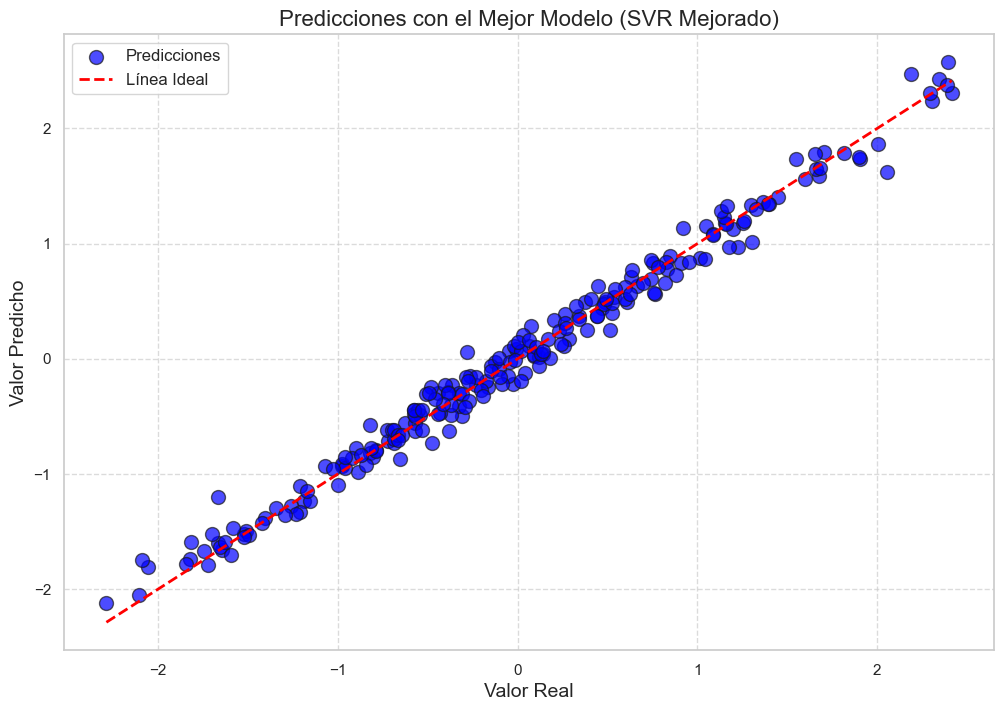

In [31]:
# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_svr_mejorado, color='blue', edgecolor='k', alpha=0.7, s=100, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2, label='Línea Ideal')
plt.xlabel('Valor Real', fontsize=14)
plt.ylabel('Valor Predicho', fontsize=14)
plt.title('Predicciones con el Mejor Modelo (SVR Mejorado)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
